In [2]:
from google.colab import files
from IPython import display 

In [3]:
image=files.upload()

Saving lathaa pic.jpeg to lathaa pic.jpeg


In [4]:
import cv2

In [5]:
import numpy as np

In [6]:
from google.colab.patches import cv2_imshow

In [7]:
num_down=2
num_bilateral=7

In [8]:
img_rgb=cv2.imread("lathaa pic.jpeg")
print(img_rgb.shape)

(1280, 959, 3)


In [9]:
img_rgb=cv2.resize(img_rgb,(800,800))

In [10]:
img_color=img_rgb
for _ in range(num_down):
  img_color=cv2.pyrDown(img_color)

In [11]:
for _ in range(num_bilateral):
  img_color=cv2.bilateralFilter(img_color,d=9,sigmaColor=9,sigmaSpace=7)

In [12]:
for _ in range(num_down):
  img_color=cv2.pyrUp(img_color)

In [17]:
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
img_blur=cv2.medianBlur(img_gray,7)
img_edge=cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blockSize=9,C=2)

In [18]:
img_edge=cv2.cvtColor(img_edge,cv2.COLOR_GRAY2RGB)
img_cartoon=cv2.bitwise_and(img_color,img_edge)

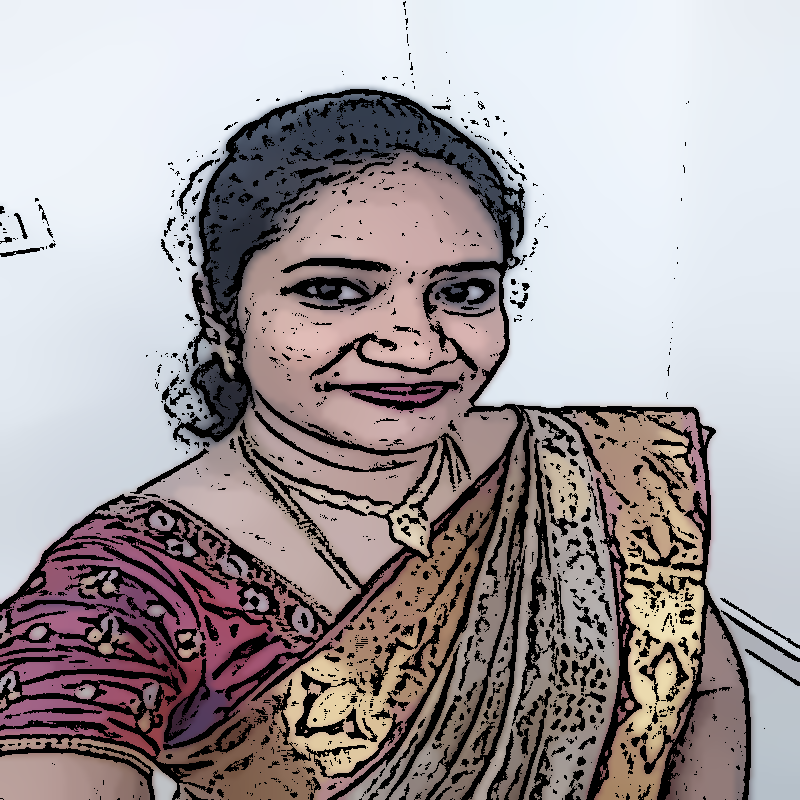

In [19]:
cv2_imshow(img_cartoon)

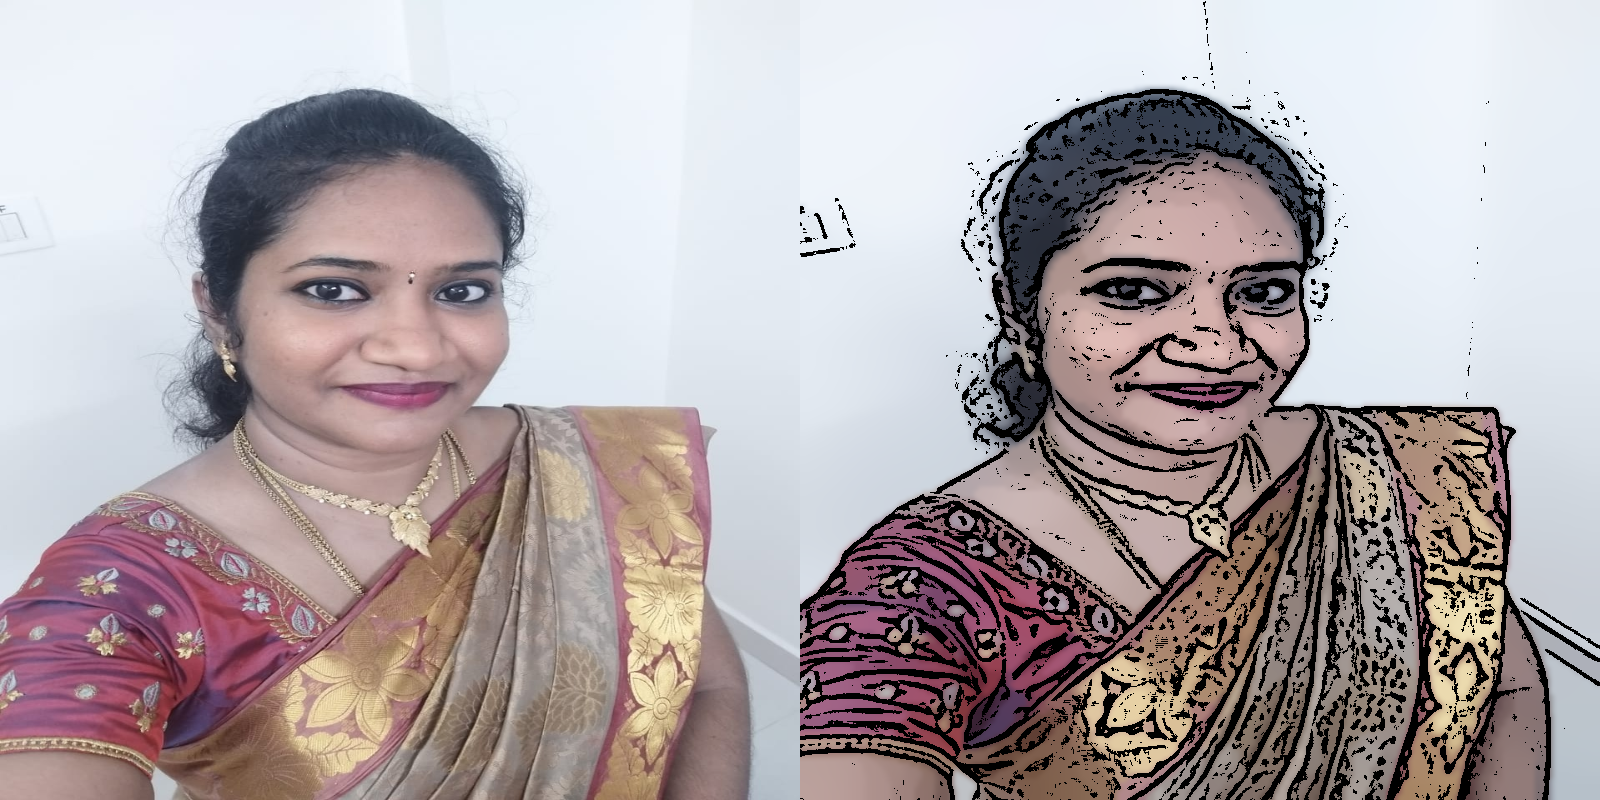

In [23]:
stack=np.hstack((img_rgb,img_cartoon))
cv2_imshow(stack)